In [30]:
DATASET_PATH_NORMAL = "/data/datasets/tdt17/RDD2022_YOLO_Norway"
DATASET_PATH_CHIPPED = "/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped"

In [31]:
import matplotlib.pyplot as plt
import os
from PIL import Image
from typing import Literal
import glob

In [32]:
def class_id_to_name(class_id: int) -> str:
    return {
        0: "D00",
        1: "D10",
        2: "D20",
        3: "D40",
    }[class_id]

def _plot_bounding_boxes_on_ax(ax: plt.Axes, image_path: str):
    image = Image.open(image_path)
    image_width, image_height = image.size

    label_path = image_path.replace("images", "labels").replace(".jpg", ".txt")

    bounding_boxes = []

    if os.path.exists(label_path):
        with open(label_path) as f:
            lines = f.readlines()

        for line in lines:
            class_id, x_center, y_center, width, height = line.split()
            class_id = int(class_id)
            x_center, y_center, width, height = map(float, (x_center, y_center, width, height))
            x_center *= image_width
            y_center *= image_height
            width *= image_width
            height *= image_height

            x_min = x_center - width / 2
            y_min = y_center - height / 2
            x_max = x_center + width / 2
            y_max = y_center + height / 2

            bounding_boxes.append((class_id, (x_min, y_min, x_max, y_max)))

    ax.imshow(image)

    for class_id, (x_min, y_min, x_max, y_max) in bounding_boxes:
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor="yellow", linewidth=1))
        ax.text(x_min, y_min, class_id_to_name(class_id), bbox=dict(facecolor="yellow", alpha=0.5), fontsize=10)


def plot_bounding_boxes(image_name: str):
    # show the normal image
    normal_image_path = os.path.join(DATASET_PATH_NORMAL, "images", "train", image_name)
    chipped_image_dir = os.path.join(DATASET_PATH_CHIPPED, "images", "train")
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    _plot_bounding_boxes_on_ax(ax, normal_image_path)

    plt.axis("off")
    plt.show()

    # show the chipped image
    image_id = image_name.split(".")[0].split("_")[1]
    fig, axs = plt.subplots(12, 12, figsize=(16, 16))

    used_chipped_image_paths = []
    for chipped_image_path in glob.glob(os.path.join(chipped_image_dir, f"*_{image_id}*.jpg")):
        row, col = chipped_image_path.rsplit("_")[-2:]
        row, col = int(row), int(col.split(".")[0])

        ax = axs[row, col]
        ax.axis("off")

        _plot_bounding_boxes_on_ax(ax, chipped_image_path)
        
        used_chipped_image_paths.append(chipped_image_path)

    # remove empty axes
    for ax in axs.flat:
        if not ax.images:
            fig.delaxes(ax)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis("off")
    plt.show()

    print("Original image:", normal_image_path)
    print("Chipped images:", used_chipped_image_paths)


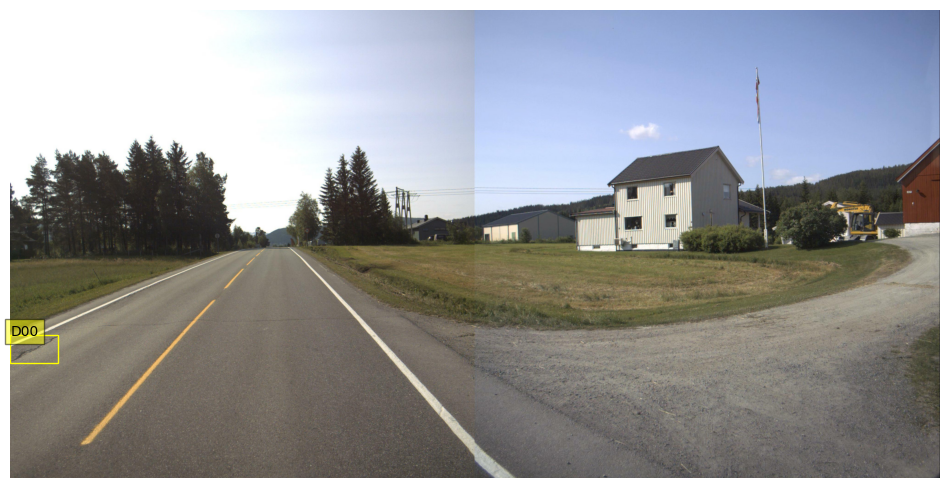

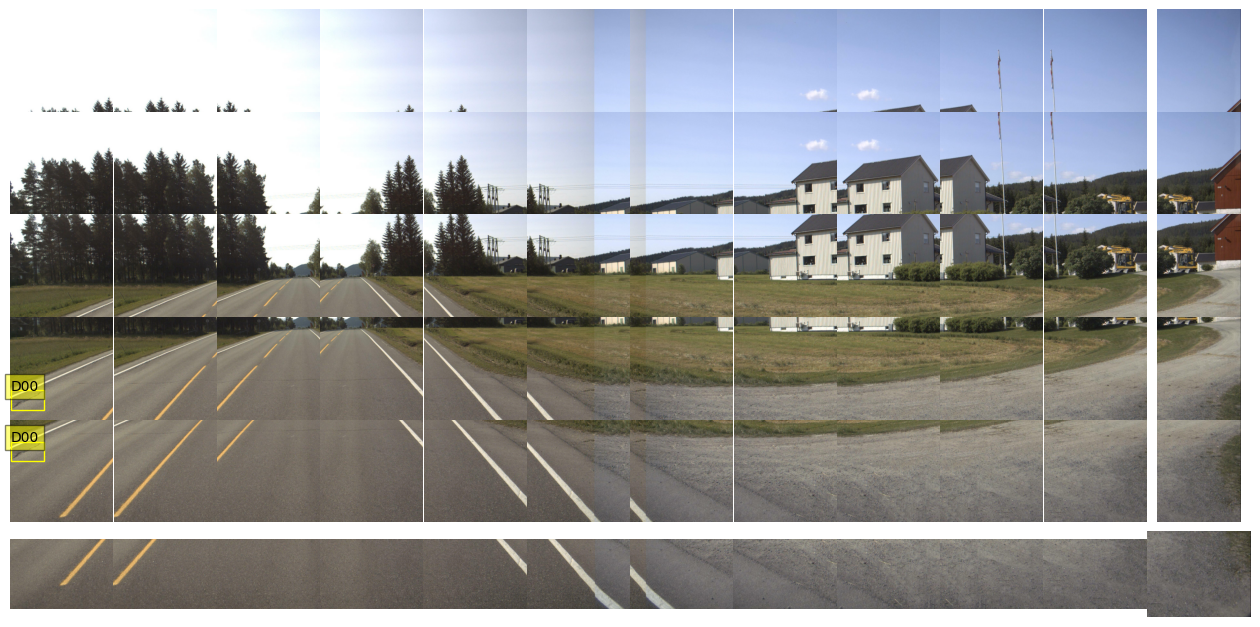

Original image: /data/datasets/tdt17/RDD2022_YOLO_Norway/images/train/Norway_008108.jpg
Chipped images: ['/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_008108_2_11.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_008108_2_5.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_008108_3_2.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_008108_3_9.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_008108_0_6.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_008108_4_7.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_008108_5_1.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_008108_4_10.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_008108_2_7.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_008108_3_5.jpg', '/data/datasets/tdt17/R

In [33]:
plot_bounding_boxes("Norway_008108.jpg")

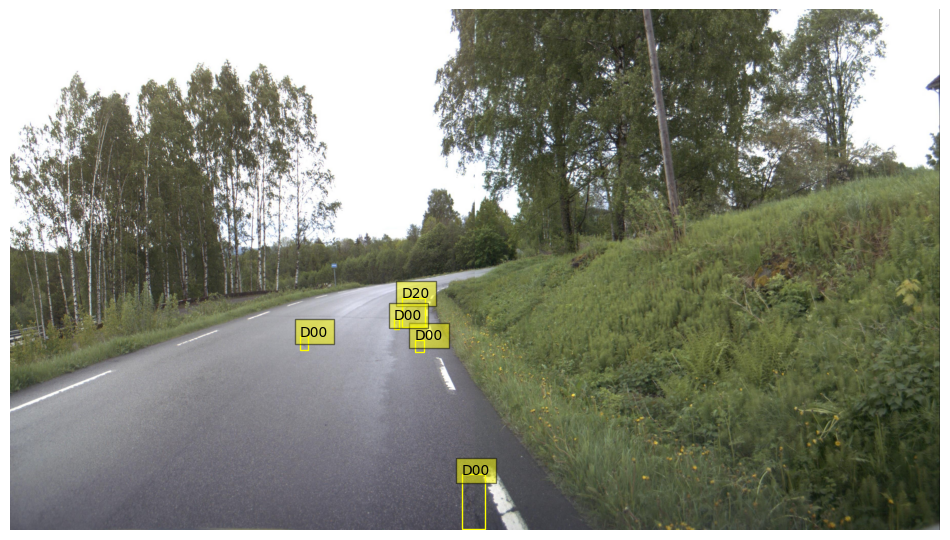

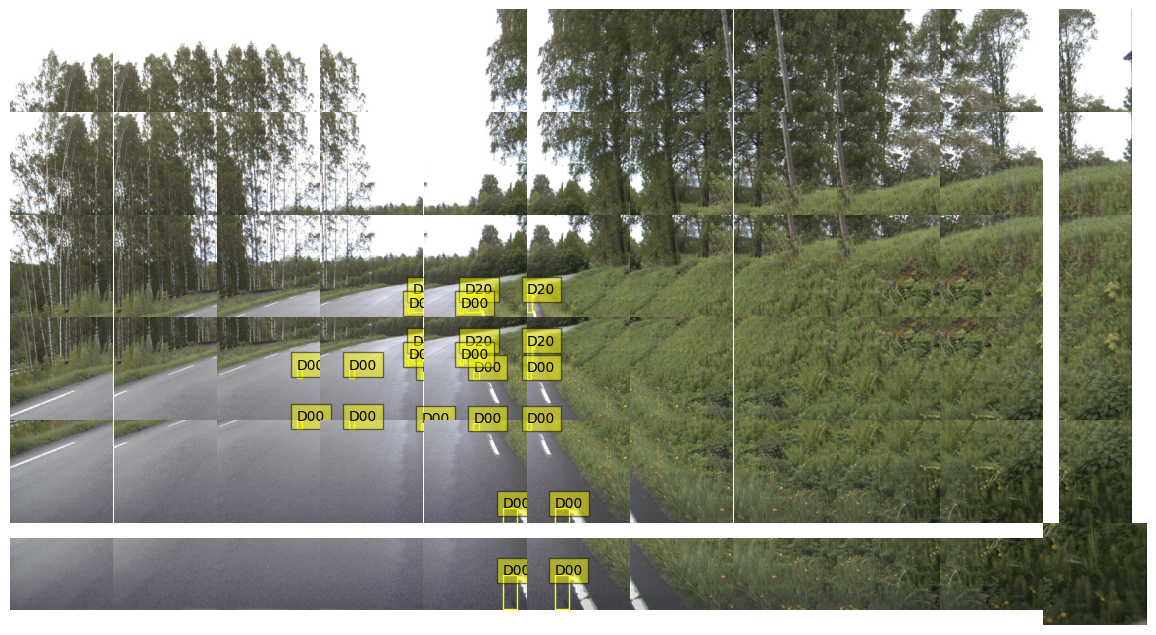

Original image: /data/datasets/tdt17/RDD2022_YOLO_Norway/images/train/Norway_000000.jpg
Chipped images: ['/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000000_4_8.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000000_4_7.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000000_1_5.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000000_0_6.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000000_5_2.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000000_5_6.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000000_5_3.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000000_3_5.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000000_3_3.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000000_4_6.jpg', '/data/datasets/tdt17/RDD

In [34]:
plot_bounding_boxes("Norway_000000.jpg")

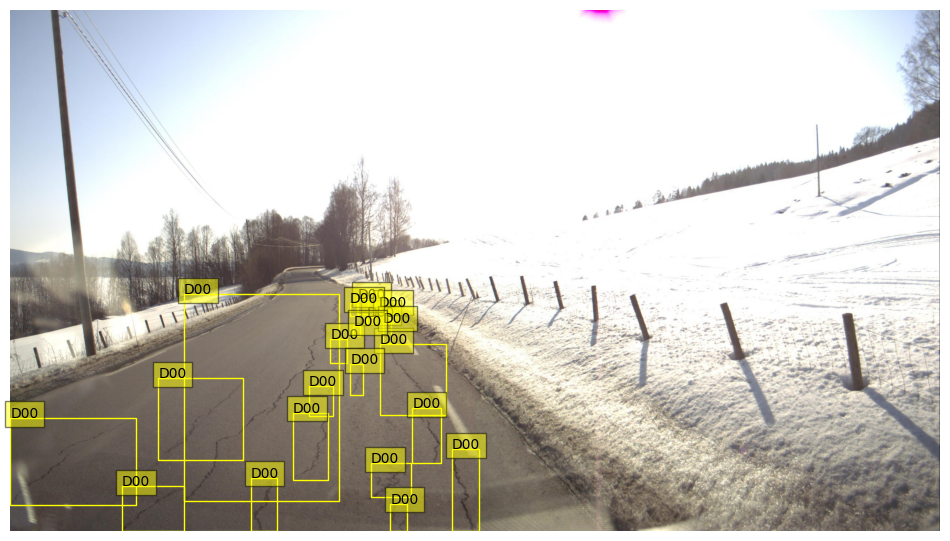

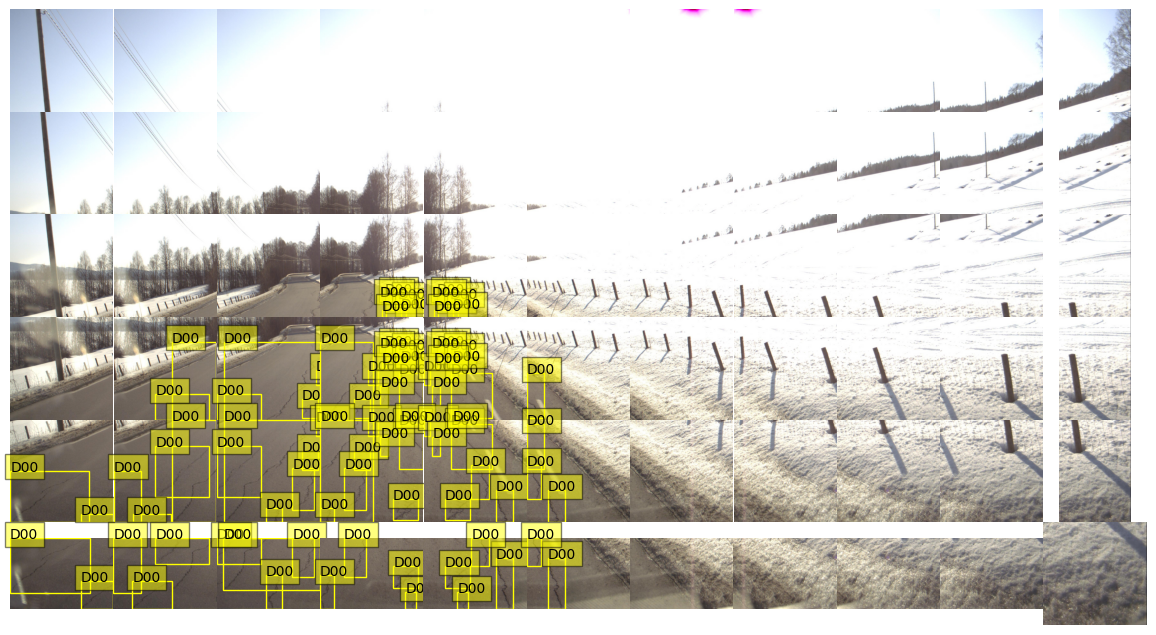

Original image: /data/datasets/tdt17/RDD2022_YOLO_Norway/images/train/Norway_000484.jpg
Chipped images: ['/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000484_2_10.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000484_3_10.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000484_1_0.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000484_1_4.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000484_1_1.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000484_3_5.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000484_4_3.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000484_5_3.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000484_3_0.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_000484_3_3.jpg', '/data/datasets/tdt17/R

In [35]:
plot_bounding_boxes("Norway_000484.jpg")

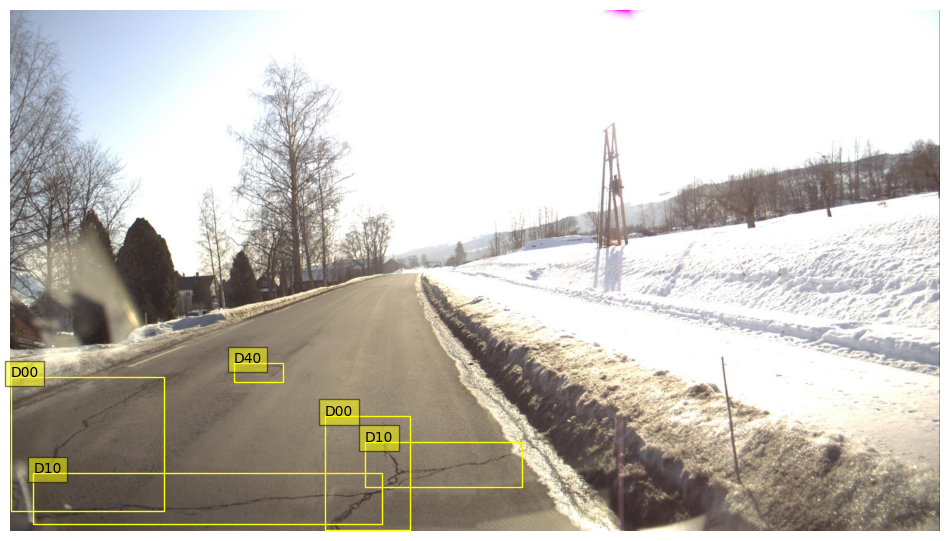

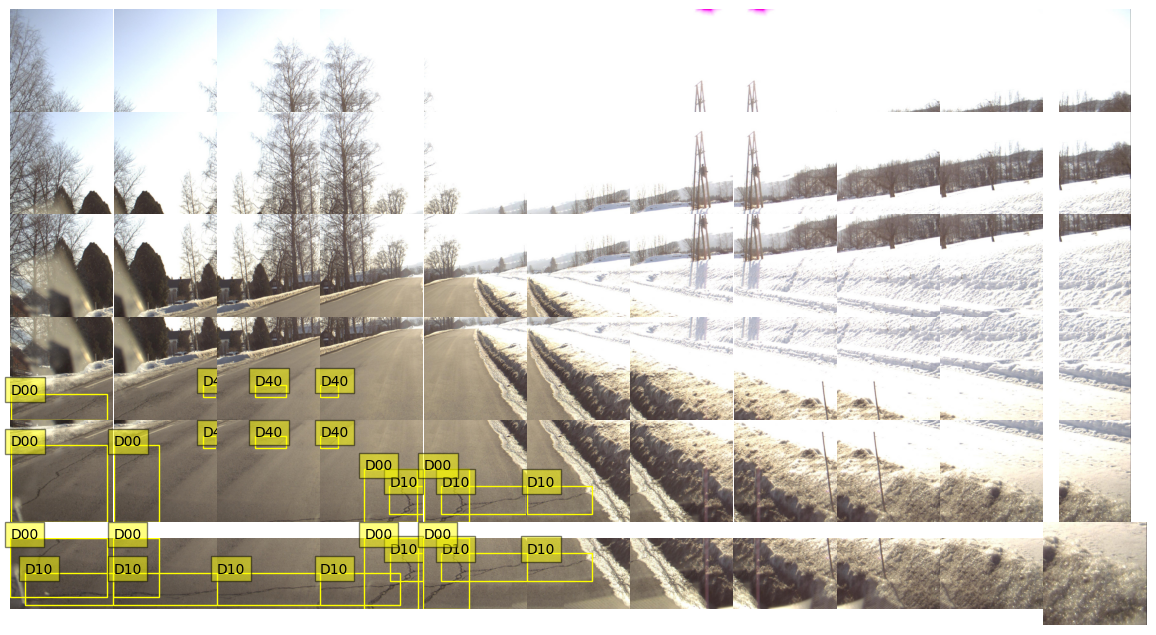

Original image: /data/datasets/tdt17/RDD2022_YOLO_Norway/images/train/Norway_005695.jpg
Chipped images: ['/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_005695_3_0.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_005695_3_6.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_005695_0_7.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_005695_4_9.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_005695_0_6.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_005695_2_1.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_005695_1_1.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_005695_5_3.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_005695_4_4.jpg', '/data/datasets/tdt17/RDD2022_YOLO_Norway_chipped/images/train/Norway_005695_2_2.jpg', '/data/datasets/tdt17/RDD

In [36]:
plot_bounding_boxes("Norway_005695.jpg")